# Visualización de datos 

In [2]:
#install.packages("tidyverse")
#install.packages("gganimate")
#install.packages("plotly")
#install.packages("gifski")
#install.packages("RColorBrewer")
#install.packages("wesanderson")
#install.packages("readxl")
#install.packages("openxlsx")

library(gifski)
library(tidyverse)
library(gganimate)
library(plotly)
library(RColorBrewer)
library(wesanderson)
library(readxl)
library(openxlsx)


In [47]:
casos_diarios <-  read.xlsx("Casos_Diarios_Municipio.xlsx", sheet = "Casos_Diarios_Municipio_Confirm")
casos_diarios_municipios <- casos_diarios %>%
filter(nombre == c("Durango", "Lerdo", "Santiago"))
casos_diarios_municipios

cve_ent,poblacion,nombre,43887,43888,43889,43890,43891,43892,43893,...,44730,44731,44732,44733,44734,44735,44736,44737,44738,44739
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19049,46955,Santiago,0,0,0,0,0,0,0,...,1,0,9,5,12,4,12,1,0,0
10005,695597,Durango,0,0,0,0,0,0,0,...,14,18,119,93,120,130,96,22,21,0
10012,164763,Lerdo,0,0,0,0,0,0,0,...,0,0,7,1,3,0,7,0,0,0


In [49]:
# codigo limpieza y manipulación 
casos_diario_list <- gather(casos_diarios_municipios, key ="dias",value="infectados",4:856)

normalizarfecha <- function(fecha){
return(str_replace_all(fecha,"X","")  %>% str_replace_all("\\.","/"))
}

cod_Meses <- function(x) {

labels_meses <- c(
    "Ene","Feb","Mar","Abr","May","Jun",
    "Jul","Ago","Sep","Oct","Nov","Dic")

    return(factor(x,levels = (1:12),labels = labels_meses))
    
    }

fecha = map(casos_diario_list[4],normalizarfecha)
casos_diarios_fecha <- cbind(casos_diario_list[c(TRUE,TRUE,TRUE,FALSE,TRUE)],fecha)
casos_diarios_fecha <- casos_diarios_fecha[c(1,2,3,5,4)]

datos <- separate( data = casos_diarios_fecha,
                   col =dias,
                   into = c("dia","mes","año"),
                   sep = '/',
                   remove = FALSE)

#recordatorio
datos <- datos %>% mutate(mest_txt = cod_Meses(as.integer(mes))) %>% mutate(consecutivo = 1:2559)
str(datos)


Warning message:
"Expected 3 pieces. Missing pieces filled with `NA` in 2559 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...]."


'data.frame':	2559 obs. of  10 variables:
 $ cve_ent    : num  19049 10005 10012 19049 10005 ...
 $ poblacion  : num  46955 695597 164763 46955 695597 ...
 $ nombre     : chr  "Santiago" "Durango" "Lerdo" "Santiago" ...
 $ dias       : chr  "43887" "43887" "43887" "43888" ...
 $ dia        : chr  "43887" "43887" "43887" "43888" ...
 $ mes        : chr  NA NA NA NA ...
 $ año        : chr  NA NA NA NA ...
 $ infectados : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mest_txt   : Factor w/ 12 levels "Ene","Feb","Mar",..: NA NA NA NA NA NA NA NA NA NA ...
 $ consecutivo: int  1 2 3 4 5 6 7 8 9 10 ...


# plot basico

In [50]:
head(datos)
#municipios <- datsos %>%
 #   select("Torreon", "Durango", "Santiago Lerdo")

,cve_ent,poblacion,nombre,dias,dia,mes,año,infectados,mest_txt,consecutivo
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<int>
1,19049,46955,Santiago,43887,43887,NA,NA,0,NA,1
2,10005,695597,Durango,43887,43887,NA,NA,0,NA,2
3,10012,164763,Lerdo,43887,43887,NA,NA,0,NA,3
4,19049,46955,Santiago,43888,43888,NA,NA,0,NA,4
5,10005,695597,Durango,43888,43888,NA,NA,0,NA,5
6,10012,164763,Lerdo,43888,43888,NA,NA,0,NA,6


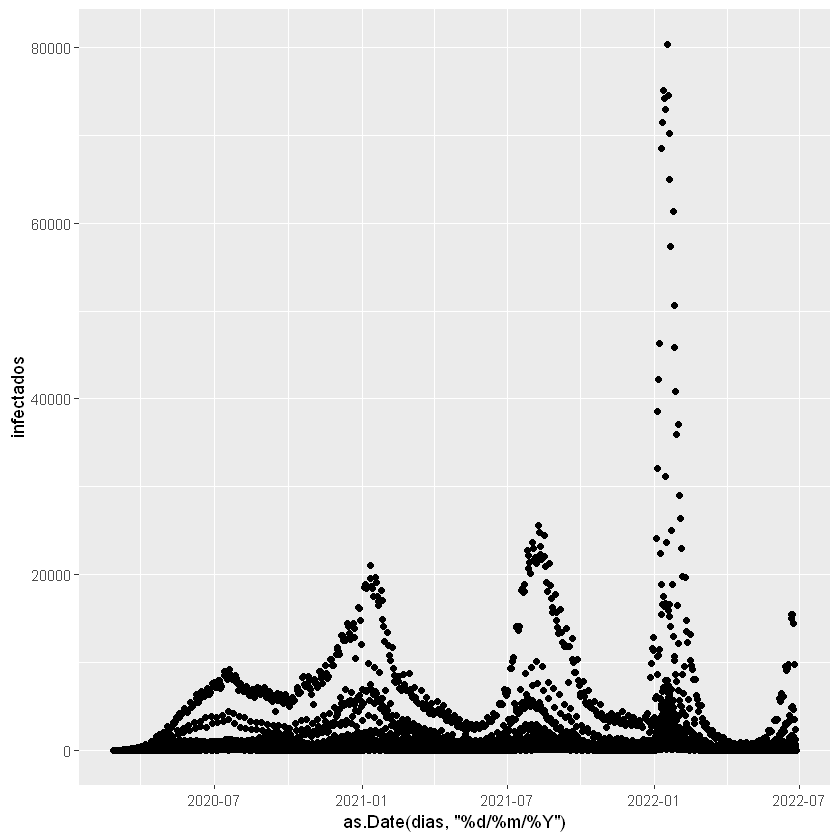

In [5]:
datos %>% ggplot(aes(x = as.Date(dias, "%d/%m/%Y"), y = infectados )) +
    geom_point()

### Añadiendo grafica filtrado

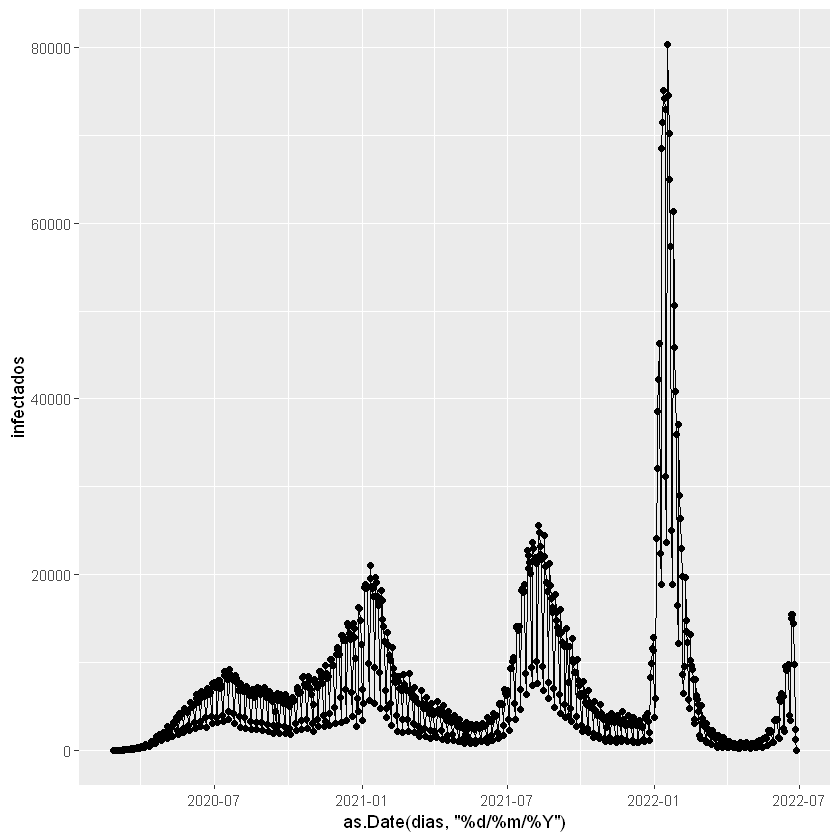

In [6]:
datos %>% filter(nombre == "Nacional") %>%
    ggplot(aes(x = as.Date(dias, "%d/%m/%Y"), y = infectados )) +
    geom_point() +
    geom_line() 

## Añadir línea suave

`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'



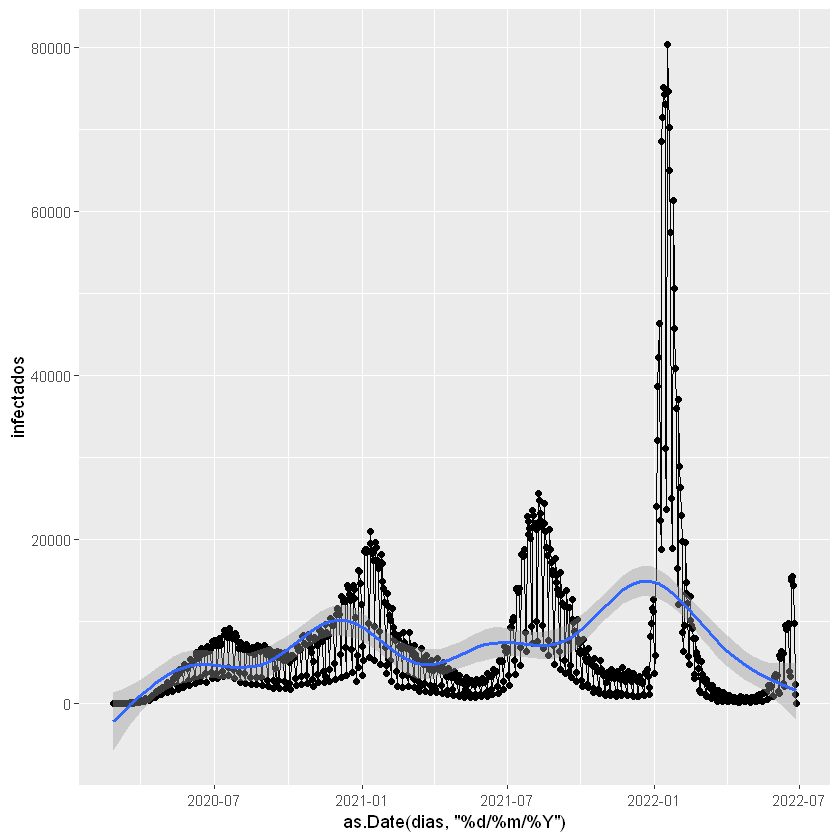

In [7]:
datos %>% filter(nombre == "Nacional") %>%
    ggplot(aes(x = as.Date(dias, "%d/%m/%Y"), y = infectados )) +
    geom_point() +
    geom_line() +
   stat_smooth(method = "gam", aes(x = as.Date(dias, "%d/%m/%Y"), y = infectados ))


`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'



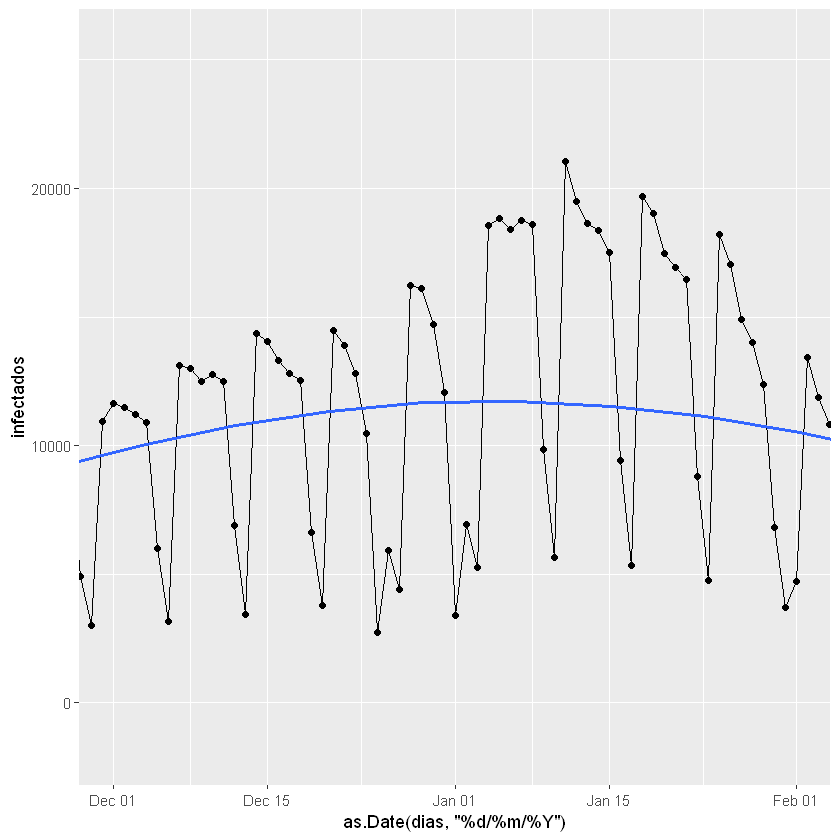

In [8]:
datos %>% filter(nombre == "Nacional") %>% filter (año %in% c("2020", "2021") ) %>%
    ggplot(aes(x = as.Date(dias, "%d/%m/%Y"), y = infectados )) +
    geom_point() +
    geom_line() +
    stat_smooth(method = "gam", aes(x = as.Date(dias, "%d/%m/%Y"), y = infectados )) +
    coord_cartesian(xlim = c(as.Date("01/12/2020", "%d/%m/%Y"), as.Date("01/02/2021",  "%d/%m/%Y")))

## Añadir series modificar estructura de datos

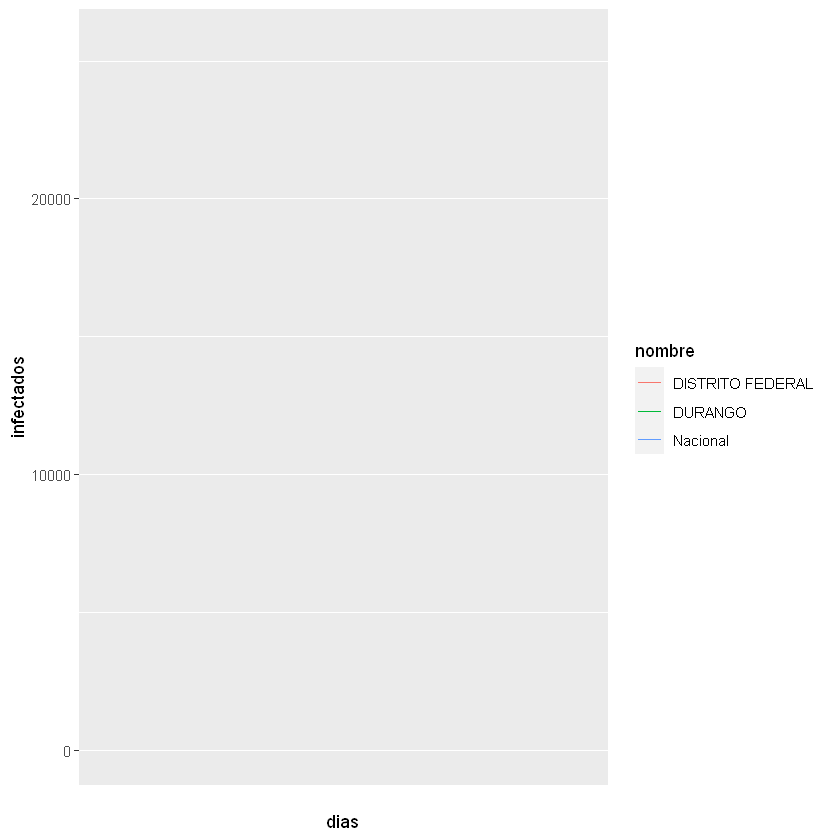

In [17]:
datos %>% filter( nombre %in% c("Nacional" ,"DURANGO","DISTRITO FEDERAL")) %>% filter (año %in% c("2020","2021") ) %>% 
        ggplot(aes(x = dias, y = infectados, group  = nombre,color = nombre)) +
        geom_point(fill = "#A4A4A4" ,color = "darkred") + geom_line() +
        coord_cartesian(xlim = c (as.Date("01/12/2020","%d/%m/%Y"), as.Date("01/02/2021","%d/%m/%Y")))

### Animar

In [27]:
options(jupyter.plot_mimetypes = "image/png")
p1 <- datos %>% filter( nombre %in% c("Nacional" ,"DURANGO","DISTRITO FEDERAL")) %>% filter (año %in% c("2020","2021") ) %>% 
        ggplot(aes(x = dias, y = infectados, group  = nombre,color = nombre)) +
        geom_point(fill = "#A4A4A4" ,color = "darkred") + geom_line() +
        coord_cartesian(xlim = c (as.Date("01/12/2020","%d/%m/%Y"), as.Date("01/02/2021","%d/%m/%Y")))
        transition_reveal(dias)

mi_gif <-animate(p1, width = 1600, height = 800, render = gifski_renderer(loop = TRUE))
#anuim_save(filename = "animacion.gif")


<ggproto object: Class TransitionReveal, Transition, gg>
    adjust_nframes: function
    expand_data: function
    expand_layer: function
    expand_panel: function
    finish_data: function
    get_all_row_vars: function
    get_frame_data: function
    get_frame_vars: function
    get_row_vars: function
    map_data: function
    mapping: (.+)
    params: list
    remap_frames: function
    require_late_tween: function
    setup_params: function
    setup_params2: function
    static_layers: function
    unmap_frames: function
    var_names: along
    super:  <ggproto object: Class TransitionReveal, Transition, gg>

ERROR: Error in animate.default(p1, width = 1600, height = 800, render = gifski_renderer(loop = TRUE)): animation of gg objects not supported


In [23]:
<img src = "animacion.gif" height = "100">

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '<'
1: <
    ^
